In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [422]:
data=pd.read_excel("zomato_train.xlsx")

In [423]:
 data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [424]:
print(data['listed_in(city)'].unique())
data['listed_in(city)'].isna().sum()

['Residency Road' 'Koramangala 6th Block' 'Koramangala 4th Block' 'BTM'
 'Sarjapur Road' 'Bannerghatta Road' 'MG Road' 'Indiranagar'
 'Lavelle Road' 'Whitefield' 'Koramangala 7th Block' 'Bellandur'
 'Brigade Road' 'Jayanagar' 'HSR' 'Old Airport Road' 'JP Nagar'
 'Kammanahalli' 'Rajajinagar' 'Brookefield' 'New BEL Road' 'Basavanagudi'
 'Frazer Town' 'Church Street' 'Kalyan Nagar' 'Malleshwaram'
 'Marathahalli' 'Banashankari' 'Koramangala 5th Block' 'Electronic City']


0

In [63]:
print(len(data['listed_in(type)'].unique()))
data['listed_in(type)'].isna().sum()

7


0

In [64]:
print(len(data['online_order'].unique()))
data['online_order'].isna().sum()

2


0

In [65]:
print(len(data['book_table'].unique()))
data['book_table'].isna().sum()

2


0

In [67]:
print(len(data['location'].unique()))
data['location'].isna().sum()

94


15

In [316]:
data1=data.drop(columns=['url','address','name','phone','location','listed_in(city)'])

In [317]:
data1.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rates,review_ratings
0,Yes,No,13,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,3.1,2.200000
1,No,Yes,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,4.6,4.300000
2,No,No,6,Quick Bites,NaN,Kerala,250,[],[],Dine-out,3.4,NaN
3,No,No,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,4.3,3.764706
4,Yes,No,129,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,3.7,2.250000


In [318]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [319]:
data1['online_order']=LabelBinarizer().fit_transform(data1.online_order)

In [320]:
data1['book_table']=LabelBinarizer().fit_transform(data1.book_table)

In [321]:
data1['listed_in(type)']=LabelEncoder().fit_transform(data1['listed_in(type)'])

In [324]:
data1['listed_in(type)'].unique()

array([2, 4, 5, 3, 1, 6, 0], dtype=int64)

In [337]:
#data1=data1.drop('reviews_list',axis=1)
#data1=data1.drop('dish_liked',axis=1)
#data1=data1.drop('menu_item',axis=1)
data1.head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),rates,review_ratings
0,1,0,13,Quick Bites,"North Indian, South Indian, Arabian",350,2,3.1,2.200000
1,0,1,5015,"Casual Dining, Pub","European, Continental","1,800",4,4.6,4.300000
2,0,0,6,Quick Bites,Kerala,250,4,3.4,NaN
3,0,0,699,Casual Dining,"Thai, Chinese, Indonesian, Asian, Momos","1,500",4,4.3,3.764706
4,1,0,129,Beverage Shop,"Juices, Fast Food",150,2,3.7,2.250000


In [ ]:
for i in data1['cuisines']:
    

In [357]:
c=[]
for i in data['cuisines']:
    if type(i) == float:
        c.append('common')
    else:
        k=[]
        for j in i.split(','):
            j=j.lower().replace(' ','')
            k.append(j)
        c.append(k)

In [359]:
data1['cuisines']=c

In [360]:
data1.head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),rates,review_ratings
0,1,0,13,Quick Bites,"[northindian, southindian, arabian]",350,2,3.1,2.200000
1,0,1,5015,"Casual Dining, Pub","[european, continental]","1,800",4,4.6,4.300000
2,0,0,6,Quick Bites,[kerala],250,4,3.4,NaN
3,0,0,699,Casual Dining,"[thai, chinese, indonesian, asian, momos]","1,500",4,4.3,3.764706
4,1,0,129,Beverage Shop,"[juices, fastfood]",150,2,3.7,2.250000


In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 18 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [9]:
data.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [10]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
rates                          object
dtype: object

In [15]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

(array([3.7904e+04, 1.7660e+03, 8.3100e+02, 3.4100e+02, 1.9600e+02,
        1.5300e+02, 1.7000e+01, 2.8000e+01, 6.3000e+01, 2.1000e+01,
        1.8000e+01, 3.0000e+00, 1.1000e+01, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.5000e+01, 0.0000e+00, 5.0000e+00]),
 array([    0. ,   841.6,  1683.2,  2524.8,  3366.4,  4208. ,  5049.6,
         5891.2,  6732.8,  7574.4,  8416. ,  9257.6, 10099.2, 10940.8,
        11782.4, 12624. , 13465.6, 14307.2, 15148.8, 15990.4, 16832. ]),
 <a list of 20 Patch objects>)

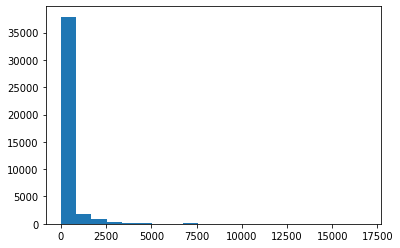

In [26]:
plt.hist(x=data.votes,bins=20)

In [38]:
data.votes.isna().sum()

0

In [27]:
data.votes.max()

16832

In [28]:
data.votes.min()

0

In [31]:
data.rates.head()

0    3.1 
1    4.6 
2    3.4 
3    4.3 
4    3.7 
Name: rates, dtype: object

In [36]:
data.rates.dtypes

dtype('O')

In [39]:
data.rates.isna().sum()

7981

In [372]:
from sklearn.preprocessing import MultiLabelBinarizer,OneHotEncoder

In [362]:
one_hot = MultiLabelBinarizer()

In [90]:
len(data['cuisines'].unique())
data["cuisines"].head().map(lambda x: x.lower())

0        north indian, south indian, arabian
1                      european, continental
2                                     kerala
3    thai, chinese, indonesian, asian, momos
4                          juices, fast food
Name: cuisines, dtype: object

In [366]:
data["cuisines"].unique

<bound method Series.unique of 0                   North Indian, South Indian, Arabian
1                                 European, Continental
2                                                Kerala
3               Thai, Chinese, Indonesian, Asian, Momos
4                                     Juices, Fast Food
                              ...                      
41368    South Indian, North Indian, Chinese, Beverages
41369                  North Indian, Fast Food, Chinese
41370                                 North Indian, BBQ
41371                        North Indian, Healthy Food
41372                                      South Indian
Name: cuisines, Length: 41373, dtype: object>

In [391]:
 data1.head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),rates,review_ratings
0,1,0,13,1,1,350,2,3.1,2.200000
1,0,1,5015,0,0,"1,800",4,4.6,4.300000
2,0,0,6,0,0,250,4,3.4,NaN
3,0,0,699,0,0,"1,500",4,4.3,3.764706
4,1,0,129,1,1,150,2,3.7,2.250000


In [396]:
data1=data1.drop('cuisines',axis=1)
data1=data1.drop('rest_type',axis=1)

In [397]:
data1.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),rates,review_ratings
0,1,0,13,350,2,3.1,2.200000
1,0,1,5015,"1,800",4,4.6,4.300000
2,0,0,6,250,4,3.4,NaN
3,0,0,699,"1,500",4,4.3,3.764706
4,1,0,129,150,2,3.7,2.250000


In [377]:
one_hot.classes_

array(['american', 'arabian', 'asian', 'beverages', 'biryani', 'cafe',
       'chinese', 'continental', 'desserts', 'european', 'fastfood',
       'french', 'healthyfood', 'icecream', 'indonesian', 'italian',
       'juices', 'kerala', 'mexican', 'momos', 'northindian', 'pizza',
       'salad', 'sandwich', 'southindian', 'streetfood', 'thai'],
      dtype=object)

In [124]:
data.reviews_list[0].find('Rated 1.0')

3

In [247]:
data.reviews_list[1721].split(',')
re.findall("\d\.\d", data.reviews_list[1721])

['3.0', '9.3']

In [248]:
d=[]
for i in range(len(data.reviews_list)):
    x=re.findall("\d\.\d", data.reviews_list[i])
    c=[]
    total=0
    for i in x:
        if float(i) <= 5:
            c.append(float(i))
        total=total+float(i)
    c=np.array(c)
    d.append(np.mean(c))

In [249]:
c=0
for i in d:
    if i>5:
        print(c)
    c=c+1

In [251]:
data['review_ratings']=d

In [252]:
data.review_ratings[1721]

3.0

In [253]:
data[data.review_ratings.isna()].rates.isna().sum()

5115

In [224]:
data.cuisines.head()

0        North Indian, South Indian, Arabian
1                      European, Continental
2                                     Kerala
3    Thai, Chinese, Indonesian, Asian, Momos
4                          Juices, Fast Food
Name: cuisines, dtype: object

In [241]:
s='my age is 25. I have 55.50 percent marks and 9764135408 is my number'

In [245]:
re.findall('\d\.\d',s)

['5.5']

In [272]:
print(len(data['cuisines'].unique()))
#data["cuisines"].head(300).map(lambda x: x.lower())
data.cuisines[1]

2655


'European, Continental'

In [276]:
x=[]
for i in range(len(data.cuisines)):
    x.append(re.findall('/d/',data['cuisines'][i]))
    

TypeError: expected string or bytes-like object

In [274]:
x

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [277]:
data.rates.isna().sum()

7981

0        False
1        False
2        False
3        False
4        False
         ...  
41368    False
41369    False
41370    False
41371    False
41372    False
Name: review_ratings, Length: 41373, dtype: bool

In [280]:
(data.votes==0).sum()

8020

In [286]:
for i in range(len(data)):
    if(data.rates[i]=='NaN' & data.review_ratings[i]=='NaN' & data.votes==0):
        data.drop[data.index[i]]

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [398]:
data1.columns

Index(['online_order', 'book_table', 'votes', 'approx_cost(for two people)',
       'listed_in(type)', 'rates', 'review_ratings'],
      dtype='object')

In [400]:
data1.isna().sum()

online_order                      0
book_table                        0
votes                             0
approx_cost(for two people)     279
listed_in(type)                   0
rates                          7981
review_ratings                 6045
dtype: int64

In [407]:
data1=data1.dropna(subset=['rates'])

In [420]:
data1['approx_cost(for two people)'].value_counts()

Series([], Name: approx_cost(for two people), dtype: int64)

In [418]:
data1['approx_cost(for two people)']=data1['approx_cost(for two people)'].fillna(300,inplace=True)

In [419]:
data1.isna().sum()

online_order                       0
book_table                         0
votes                              0
approx_cost(for two people)    33392
listed_in(type)                    0
rates                              0
review_ratings                   930
dtype: int64